In [65]:
# look at timeseries compared to events file

# this is an example file - where it reads the timeseries (based on aal atlas) and plot it agasint the events

In [47]:
import pandas as pd
import numpy as np
import nilearn

import matplotlib.pyplot as plt

import nibabel as nb
from nilearn.maskers import NiftiLabelsMasker

In [3]:
events_file = '/gpfs/gibbs/pi/levy_ifat/Or/RCF_Bids/event_files/ses-1/sub-020.csv' 
func_file = '/gpfs/gibbs/pi/levy_ifat/Or/RCF_Bids/derivatives/fmriprep/sub-020/ses-1/func/sub-020_ses-1_task-task556_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'

In [4]:
from nilearn.glm.first_level import make_first_level_design_matrix

/gpfs/ysm/project/joormann/oad4/conda_envs/neuroAnalysis/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [8]:
tr = 1.0
n_scans = nb.load(func_file).shape[3]
frame_times = np.arange(n_scans) * tr 

event = pd.read_csv(events_file)matplotlib.pyplot

In [36]:
conditions = event.trial_type.unique()
times = {}
for cond in conditions:
    a = np.zeros(n_scans)
   # print(cond)  
    for i in event[event.trial_type==cond].iterrows():
        onset = i[1].onset
       # print(onset)
        duration = i[1].duration
       # print(duration)
        b = [1] * duration
        a[onset:onset+duration] = b
    times[cond] = a

In [70]:
# extract brain
# load aal atlas
aal = nilearn.datasets.atlas.fetch_atlas_aal()


masker = NiftiLabelsMasker(labels_img=aal.maps, standardize=True, detrend=True, high_pass=0.1, t_r=1,
                         verbose=5).fit()


[NiftiLabelsMasker.fit] loading data from /home/oad4/nilearn_data/aal_SPM12/aal/atlas/AAL.nii


In [71]:
ts = masker.transform(func_file)

Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from /gpfs/gibbs/pi/levy_ifat/Or/RCF_Bids/derivatives/fmriprep/sub-020/ses-1/func/sub-020_ses-1_task-task556_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


In [72]:
# plot
ts.shape

(556, 116)

In [54]:
np.array(aal.labels)

array(['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R',
       'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L',
       'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R',
       'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L',
       'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R',
       'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L',
       'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R',
       'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R',
       'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R',
       'Insula_L', 'Insula_R', 'Cingulum_Ant_L', 'Cingulum_Ant_R',
       'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L',
       'Cingulum_Post_R', 'Hippocampus_L', 'Hippocampus_R',
       'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L',
       'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R',
       'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R',
   

In [56]:
aal.labels.index('Occipital_Mid_L')

50

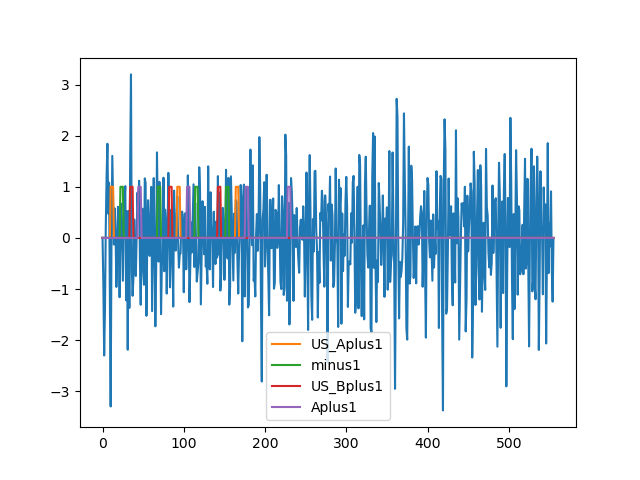

In [74]:
%matplotlib widget
plt.plot(ts[:,50])
plt.plot(times[conditions[0]], label=conditions[0])
plt.plot(times[conditions[1]], label=conditions[1])
plt.plot(times[conditions[2]], label=conditions[2])
plt.plot(times[conditions[3]], label=conditions[3])
plt.legend()